<a href="https://colab.research.google.com/github/insanudin16/materi-oyusep/blob/main/sesi6Preprosesing_analisis_konten_youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk
!pip install Sastrawi
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 5.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
import emoji
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk



In [ ]:
# Membaca data dari file CSV
df = pd.read_csv('youtube.csv')

# Menampilkan data awal
print("Data Awal:")
print(df.head())

Data Awal:
                                        Link Youtube  \
0         https://www.youtube.com/shorts/HN7ZjBKOE8E   
1  https://www.youtube.com/watch?v=UStMVr4ctPQ&pp...   
2         https://www.youtube.com/shorts/JiS8MnH49Xc   
3         https://www.youtube.com/shorts/La_i-ZxicV0   
4         https://www.youtube.com/shorts/e56F7rLFHps   

                                               Judul          Nama Channel  \
0  Begini Momen Keseruan Raffi dan Nagita Motoran...         Tribun Travel   
1  🔴LIVE - Menilik Tiga Hari Jokowi Tinggal di IK...            Kompas.com   
2  Jokowi Akui Tak Nyenyak Tidur di Istana Garuda...       POLITIKAL MEDIA   
3  HGU Di IKN Sampai 190 Tahun Investor Tetap Tak...               TJ CUKS   
4  Penampakan Ruang Kerja dan Kamar Tidur Jokowi ...  Tribun Solo Official   

                                  Link Channel        View  \
0        https://www.youtube.com/@tribuntravel    61 views   
1           https://www.youtube.com/@kompascom  2.8K views 

In [ ]:

# Mengganti nama kolom 'Nama Channel' menjadi 'channel'
df.rename(columns={'Nama Channel': 'channel'}, inplace=True)

# Mengganti nama kolom 'Nama Channel' menjadi 'channel'
df.rename(columns={'Verifikasi 3': 'verifikasi'}, inplace=True)

# Menyimpan hasil preprocessing ke file baru
df.to_csv('youtubedata.csv', index=False)

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import pytz  # Library untuk menangani zona waktu
import numpy as np

# Membaca dataset
df = pd.read_csv('youtubedata.csv')

# Fungsi untuk mengubah waktu relatif menjadi tanggal
def convert_to_date(time_str, reference_datetime):
    # Jika waktu adalah NaN, kembalikan 'Invalid Date'
    if pd.isna(time_str) or not isinstance(time_str, str):
        return 'Invalid Date'

    try:
        # Menghapus kata "Streamed" jika ada
        if 'Streamed' in time_str:
            time_str = time_str.replace('Streamed ', '')

        # Debug: Print nilai waktu yang diproses
        print(f"Processing time_str: '{time_str}'")

        if 'hour' in time_str:
            hours_ago = int(time_str.split()[0])
            date = reference_datetime - timedelta(hours=hours_ago)
        elif 'day' in time_str:
            days_ago = int(time_str.split()[0])
            date = reference_datetime - timedelta(days=days_ago)
        else:
            date = np.nan

        # Debug: Print tanggal dan jam yang dihitung
        print(f"Calculated datetime: {date}")

    except Exception as e:
        print(f"Error converting '{time_str}': {e}")
        date = np.nan

    return date.strftime('%Y-%m-%d') if pd.notna(date) else 'Invalid Date'

# Tanggal dan waktu referensi (31 Juli 2024 pukul 23:00 WIB)
reference_datetime = datetime(2024, 7, 31, 23, 0, 0, tzinfo=pytz.timezone('Asia/Jakarta'))

# Mengubah kolom "Waktu" menjadi format tanggal
df['Waktu'] = df['Waktu'].apply(lambda x: convert_to_date(x, reference_datetime))

# Mengganti 'Invalid Date' dengan tanggal default
default_date = '2024-07-31'
df['Waktu'] = df['Waktu'].replace('Invalid Date', default_date)

# Menyimpan hasil preprocessing ke file baru
df.to_csv('youtube_preprocessed.csv', index=False)

# Menampilkan beberapa hasil untuk verifikasi
print("Sample of preprocessed data:")
print(df.head())


Processing time_str: '1 hour ago'
Calculated datetime: 2024-07-31 22:00:00+07:07
Processing time_str: '30 minutes ago'
Calculated datetime: nan
Processing time_str: '2 hours ago'
Calculated datetime: 2024-07-31 21:00:00+07:07
Processing time_str: '2 hours ago'
Calculated datetime: 2024-07-31 21:00:00+07:07
Processing time_str: '2 hours ago'
Calculated datetime: 2024-07-31 21:00:00+07:07
Processing time_str: '3 hours ago'
Calculated datetime: 2024-07-31 20:00:00+07:07
Processing time_str: '3 hours ago'
Calculated datetime: 2024-07-31 20:00:00+07:07
Processing time_str: '3 hours ago'
Calculated datetime: 2024-07-31 20:00:00+07:07
Processing time_str: '3 hours ago'
Calculated datetime: 2024-07-31 20:00:00+07:07
Processing time_str: '4 hours ago'
Calculated datetime: 2024-07-31 19:00:00+07:07
Processing time_str: '5 hours ago'
Calculated datetime: 2024-07-31 18:00:00+07:07
Processing time_str: '5 hours ago'
Calculated datetime: 2024-07-31 18:00:00+07:07
Processing time_str: '6 hours ago'
C

In [ ]:
import pandas as pd
import re

# Membaca dataset
df = pd.read_csv('youtube_preprocessed.csv')

# Fungsi untuk mengubah format tampilan menjadi angka
def convert_views(view_str):
    # Jika data adalah NaN atau bukan string, kembalikan 0
    if pd.isna(view_str) or not isinstance(view_str, str):
        return 0

    # Debug: Print nilai yang diproses
    print(f"Processing view_str: '{view_str}'")

    try:
        # Menghapus kata 'views' dan spasi ekstra
        view_str = view_str.lower().replace(' views', '').strip()

        # Cek apakah ada format 'K' untuk ribuan
        if 'k' in view_str:
            number = float(view_str.replace('k', '').strip()) * 1000
        # Cek apakah ada format 'M' untuk juta
        elif 'm' in view_str:
            number = float(view_str.replace('m', '').strip()) * 1000000
        # Jika angka biasa
        else:
            # Mengganti koma dengan titik jika ada
            view_str = view_str.replace(',', '.')
            number = float(view_str.strip())

        return int(number)
    except Exception as e:
        # Menangani error konversi dan mencetak error
        print(f"Error converting '{view_str}': {e}")
        return 0

# Mengubah kolom "View" menjadi angka
df['View'] = df['View'].apply(convert_views)


# Menghapus kolom "Link Channel"
df = df.drop(columns=['Link Channel'])

# Menyimpan hasil preprocessing ke file baru
df.to_csv('youtube_preprocessed_2.csv', index=False)

# Menampilkan beberapa hasil untuk verifikasi
print("Sample of preprocessed data:")
print(df.head())


Processing view_str: '61 views'
Processing view_str: '2.8K views'
Processing view_str: '106 views'
Processing view_str: '129 views'
Processing view_str: '349 views'
Processing view_str: '9.2K views'
Processing view_str: '625 views'
Processing view_str: '267 views'
Processing view_str: '6.4K views'
Processing view_str: '659 views'
Processing view_str: '23K views'
Processing view_str: '26K views'
Processing view_str: '3.6K views'
Processing view_str: '3.4K views'
Processing view_str: '24K views'
Processing view_str: '438 views'
Processing view_str: '65K views'
Processing view_str: '849 views'
Processing view_str: '2.8K views'
Processing view_str: '8.5K views'
Processing view_str: '349 views'
Processing view_str: '9.2K views'
Processing view_str: '625 views'
Processing view_str: '267 views'
Processing view_str: '6.4K views'
Processing view_str: '659 views'
Processing view_str: '23K views'
Processing view_str: '26K views'
Processing view_str: '3.6K views'
Processing view_str: '3.4K views'


In [ ]:
# Fungsi untuk menghapus emoji
def remove_emoji(text):
    if isinstance(text, str):  # Check if the text is a string before processing
        return emoji.replace_emoji(text, replace='')
    else:
        return text  # Return the original value if it's not a string

# Fungsi untuk membersihkan teks
def clean_text(text):
    # Menghapus emoji
    text = remove_emoji(text)
    # Mengubah ke huruf kecil
    if isinstance(text, str):  # Check if the text is a string before processing
        text = text.lower()
        # Menghapus username, hashtag, dan link
        text = re.sub(r'@\w+|#\w+|http\S+', '', text)
        # Menghapus angka dan tanda baca kecuali huruf
        text = re.sub(r'[^a-z\s]', '', text)
        # Menghapus spasi ekstra
        text = re.sub(r'\s+', ' ', text).strip()
    return text

# Mengaplikasikan fungsi clean_text ke kolom 'comment'
df['cleaned_judul'] = df['judul'].apply(clean_text)

# Menampilkan data yang sudah dibersihkan
print("\nData Setelah Pembersihan:")
print(df.head())


Data Setelah Pembersihan:
                                        Link Youtube  \
0         https://www.youtube.com/shorts/HN7ZjBKOE8E   
1  https://www.youtube.com/watch?v=UStMVr4ctPQ&pp...   
2         https://www.youtube.com/shorts/JiS8MnH49Xc   
3         https://www.youtube.com/shorts/La_i-ZxicV0   
4         https://www.youtube.com/shorts/e56F7rLFHps   

                                               judul               channel  \
0  Begini Momen Keseruan Raffi dan Nagita Motoran...         Tribun Travel   
1  🔴LIVE - Menilik Tiga Hari Jokowi Tinggal di IK...            Kompas.com   
2  Jokowi Akui Tak Nyenyak Tidur di Istana Garuda...       POLITIKAL MEDIA   
3  HGU Di IKN Sampai 190 Tahun Investor Tetap Tak...               TJ CUKS   
4  Penampakan Ruang Kerja dan Kamar Tidur Jokowi ...  Tribun Solo Official   

                                  Link Channel        View       Waktu  \
0        https://www.youtube.com/@tribuntravel    61 views  2024-07-31   
1           https:/

In [ ]:
# Mengunduh stopwords dan tokenizer
nltk.download('stopwords')
nltk.download('punkt')

# Menghapus stop words
stop_words = set(stopwords.words('indonesian'))  # Gunakan stopwords bahasa Indonesia
df['cleaned_judul'] = df['cleaned_judul'].apply(
    lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]) if isinstance(x, str) else x
)

# Menampilkan data setelah penghapusan stop words
print("\nData Setelah Penghapusan Stop Words:")
print(df.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.



Data Setelah Penghapusan Stop Words:
                                        Link Youtube  \
0         https://www.youtube.com/shorts/HN7ZjBKOE8E   
1  https://www.youtube.com/watch?v=UStMVr4ctPQ&pp...   
2         https://www.youtube.com/shorts/JiS8MnH49Xc   
3         https://www.youtube.com/shorts/La_i-ZxicV0   
4         https://www.youtube.com/shorts/e56F7rLFHps   

                                               judul               channel  \
0  Begini Momen Keseruan Raffi dan Nagita Motoran...         Tribun Travel   
1  🔴LIVE - Menilik Tiga Hari Jokowi Tinggal di IK...            Kompas.com   
2  Jokowi Akui Tak Nyenyak Tidur di Istana Garuda...       POLITIKAL MEDIA   
3  HGU Di IKN Sampai 190 Tahun Investor Tetap Tak...               TJ CUKS   
4  Penampakan Ruang Kerja dan Kamar Tidur Jokowi ...  Tribun Solo Official   

                                  Link Channel        View       Waktu  \
0        https://www.youtube.com/@tribuntravel    61 views  2024-07-31   
1       

In [ ]:
# Membuat objek stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Proses stemming
df['stemmed_judul'] = df['cleaned_judul'].apply(
    lambda x: stemmer.stem(x) if isinstance(x, str) else ''
)

# Menampilkan data setelah stemming
print("\nData Setelah Stemming:")
print(df.head())


Data Setelah Stemming:
                                        Link Youtube  \
0         https://www.youtube.com/shorts/HN7ZjBKOE8E   
1  https://www.youtube.com/watch?v=UStMVr4ctPQ&pp...   
2         https://www.youtube.com/shorts/JiS8MnH49Xc   
3         https://www.youtube.com/shorts/La_i-ZxicV0   
4         https://www.youtube.com/shorts/e56F7rLFHps   

                                               judul               channel  \
0  Begini Momen Keseruan Raffi dan Nagita Motoran...         Tribun Travel   
1  🔴LIVE - Menilik Tiga Hari Jokowi Tinggal di IK...            Kompas.com   
2  Jokowi Akui Tak Nyenyak Tidur di Istana Garuda...       POLITIKAL MEDIA   
3  HGU Di IKN Sampai 190 Tahun Investor Tetap Tak...               TJ CUKS   
4  Penampakan Ruang Kerja dan Kamar Tidur Jokowi ...  Tribun Solo Official   

                                  Link Channel        View       Waktu  \
0        https://www.youtube.com/@tribuntravel    61 views  2024-07-31   
1           https://ww

In [ ]:
# Tokenisasi
df['tokens'] = df['stemmed_judul'].apply(
    lambda x: word_tokenize(x) if isinstance(x, str) else []
)

# Menampilkan data setelah tokenisasi
print("\nData Setelah Tokenisasi:")
print(df.head())

# Menyimpan data yang sudah diproses ke file baru
df.to_csv('processed_yt_ikn.csv', index=False)


Data Setelah Tokenisasi:
                                        Link Youtube  \
0         https://www.youtube.com/shorts/HN7ZjBKOE8E   
1  https://www.youtube.com/watch?v=UStMVr4ctPQ&pp...   
2         https://www.youtube.com/shorts/JiS8MnH49Xc   
3         https://www.youtube.com/shorts/La_i-ZxicV0   
4         https://www.youtube.com/shorts/e56F7rLFHps   

                                               Judul               channel  \
0  Begini Momen Keseruan Raffi dan Nagita Motoran...         Tribun Travel   
1  🔴LIVE - Menilik Tiga Hari Jokowi Tinggal di IK...            Kompas.com   
2  Jokowi Akui Tak Nyenyak Tidur di Istana Garuda...       POLITIKAL MEDIA   
3  HGU Di IKN Sampai 190 Tahun Investor Tetap Tak...               TJ CUKS   
4  Penampakan Ruang Kerja dan Kamar Tidur Jokowi ...  Tribun Solo Official   

   View       Waktu  verifikasi  \
0    61  2024-07-31  Unverified   
1  2800  2024-07-31    Verified   
2   106  2024-07-31  Unverified   
3   129  2024-07-31  Unverif

**SENTIMEN ANALYSIS**

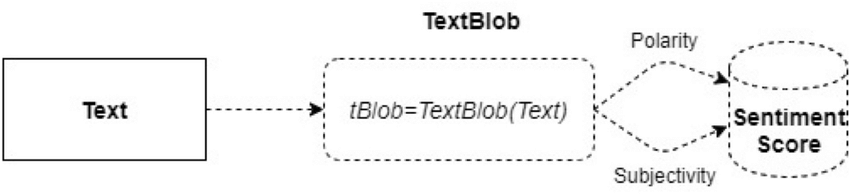


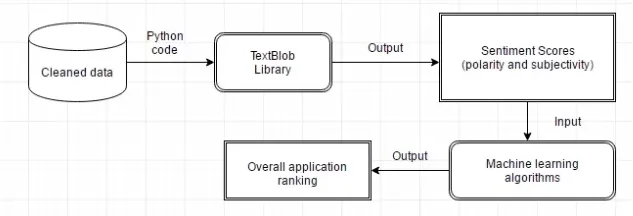

In [ ]:
import pandas as pd
from textblob import TextBlob

# Load data
df = pd.read_csv('processed_yt_ikn.csv')

# Pastikan semua entri di kolom 'cleaned_judul' adalah string
df['cleaned_judul'] = df['cleaned_judul'].astype(str)

# Fungsi untuk mendapatkan sentimen
def get_sentiment(text):
    # Mendapatkan sentimen
    sentiment = TextBlob(text).sentiment
    # Klasifikasi berdasarkan polaritas
    if sentiment.polarity > 0.1:
        return 'positif'
    elif sentiment.polarity < -0.1:
        return 'negatif'
    else:
        return 'netral'

# Terapkan fungsi pada kolom komentar
df['label'] = df['cleaned_judul'].apply(get_sentiment)

# Menyimpan hasil ke file baru
df.to_csv('labeled_data.csv', index=False)


In [ ]:
# Filter dan tampilkan data dengan label 'positif'
positive_data = df[df['label'] == 'positif']

# Menampilkan data yang berlabel positif
print(positive_data)

                                          Link Youtube  \
1    https://www.youtube.com/watch?v=UStMVr4ctPQ&pp...   
19   https://www.youtube.com/watch?v=NlAe-7ZvMJc&pp...   
35   https://www.youtube.com/watch?v=NlAe-7ZvMJc&pp...   
94   https://www.youtube.com/watch?v=o9Sn_UJyTI0&pp...   
113  https://www.youtube.com/watch?v=o9Sn_UJyTI0&pp...   
116  https://www.youtube.com/watch?v=OYyoxYjPPdU&pp...   
135  https://www.youtube.com/watch?v=OYyoxYjPPdU&pp...   
265         https://www.youtube.com/shorts/Od-tT_Hw4IU   
284         https://www.youtube.com/shorts/Od-tT_Hw4IU   
304  https://www.youtube.com/watch?v=JRkW_FSt7o4&pp...   
323  https://www.youtube.com/watch?v=JRkW_FSt7o4&pp...   
350  https://www.youtube.com/watch?v=2_5rvK4hNDI&pp...   
369  https://www.youtube.com/watch?v=2_5rvK4hNDI&pp...   
380  https://www.youtube.com/watch?v=qzXWaHY5JXQ&pp...   
398  https://www.youtube.com/watch?v=qzXWaHY5JXQ&pp...   
468         https://www.youtube.com/shorts/8v1bRkti6dk   
487         ht

In [ ]:

# Menghitung dan menampilkan jumlah setiap jenis sentimen
sentiment_counts = df['label'].value_counts()
print("Jumlah setiap jenis sentimen:")
print(sentiment_counts)

# Menampilkan jumlah total konten
total_content = df.shape[0]
print("Jumlah total konten:", total_content)

# Menampilkan jumlah sentimen negatif
negative_count = sentiment_counts.get('negatif', 0)
print("Jumlah sentimen negatif:", negative_count)

# Menampilkan jumlah sentimen netral
neutral_count = sentiment_counts.get('netral', 0)
print("Jumlah sentimen netral:", neutral_count)

# Menampilkan jumlah sentimen negatif dan netral digabungkan
negative_neutral_count = negative_count + neutral_count
print("Jumlah sentimen negatif dan netral:", negative_neutral_count)


Jumlah setiap jenis sentimen:
label
netral     1023
positif      24
negatif       2
Name: count, dtype: int64
Jumlah total konten: 1049
Jumlah sentimen negatif: 2
Jumlah sentimen netral: 1023
Jumlah sentimen negatif dan netral: 1025


In [ ]:
import pandas as pd

# Memuat data yang telah dilabeli
df = pd.read_csv('labeled_data.csv')

# Menghitung jumlah konten
jumlah_konten = df.shape[0]

# Menghitung jumlah channel unik
jumlah_channel = df['channel'].nunique()

# Menghitung jumlah channel terverifikasi dan tidak terverifikasi
jumlah_terverifikasi = df[df['verifikasi'] == 'Verified']['channel'].nunique()
jumlah_tidak_terverifikasi = df[df['verifikasi'] == 'Unverified']['channel'].nunique()

# Menghitung total jumlah views
jumlah_views = df['View'].sum()

# Menghitung jumlah setiap jenis sentimen
sentimen_counts = df['label'].value_counts()
jumlah_positif = sentimen_counts.get('positif', 0)
jumlah_negatif = sentimen_counts.get('negatif', 0)
jumlah_netral = sentimen_counts.get('netral', 0)

# Membuat DataFrame baru untuk menyimpan hasil agregasi
summary_df = pd.DataFrame({
    'Jumlah Konten': [jumlah_konten],
    'Jumlah Channel': [jumlah_channel],
    'Jumlah Channel Verifikasi': [jumlah_terverifikasi],
    'Jumlah Channel Unverifikasi': [jumlah_tidak_terverifikasi],
    'Jumlah View': [jumlah_views],
    'Jumlah Sentimen Positif': [jumlah_positif],
    'Jumlah Sentimen Negatif': [jumlah_negatif],
    'Jumlah Sentimen Netral': [jumlah_netral]
})

# Menyimpan hasil ke file CSV baru
summary_df.to_csv('summary_statistics.csv', index=False)

# Menampilkan DataFrame hasil
print(summary_df)


   Jumlah Konten  Jumlah Channel  Jumlah Channel Verifikasi  \
0           1049             241                         64   

   Jumlah Channel Unverifikasi  Jumlah View  Jumlah Sentimen Positif  \
0                          193     28024173                       24   

   Jumlah Sentimen Negatif  Jumlah Sentimen Netral  
0                        2                    1023  


**Evaluasi Model Machine Learning**

Naive Bayes atau disebut juga dengan Naive Bayes Classifiers adalah kumpulan algoritma pembeda berdasarkan teorema Bayes.

Algoritma adalah prosedur atau formula yang disusun secara sistematis untuk membantu komputer memecahkan masalah. Naive Bayes adalah salah satu algoritma yang digunakan komputer untuk melakukan tugas tertentu.

Cara kerja algoritma Naive Bayes diatur teorema Bayes yang bekerja sesuai prinsip probabilitas bersyarat (conditional probability). Probabilitas bersyarat merepresentasikan suatu probabilitas atau peluang dari suatu peristiwa, yang mengacu pada peristiwa terkait yang telah terjadi.

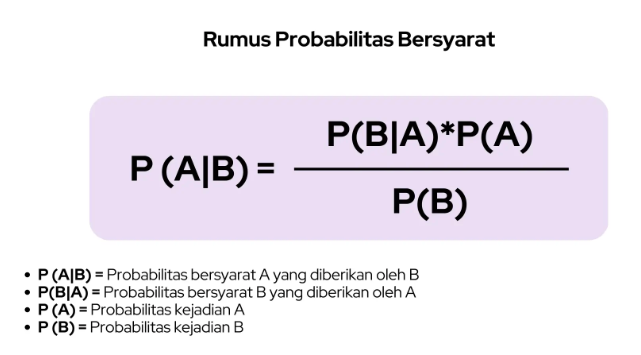

Rumus Probabilitas Bersyarat (Bayes' Theorem)
𝑃
(
𝐴
∣
𝐵
)
=
𝑃
(
𝐵
∣
𝐴
)
×
𝑃
(
𝐴
)
𝑃
(
𝐵
)
P(A∣B)=
P(B)
P(B∣A)×P(A)
​


di mana:
*   𝑃 (
𝐴
∣
𝐵
)
P(A∣B): Probabilitas sentimen
𝐴
A (positif, negatif, atau netral) mengingat teks
𝐵
B (kata-kata dalam judul video).
*   𝑃
(
𝐵
∣
𝐴
)
P(B∣A): Probabilitas teks
𝐵
B mengingat sentimen
𝐴
A — seberapa sering kata-kata dalam judul muncul dalam konteks sentimen
𝐴
A.


* 𝑃
(
𝐴
)
P(A): Probabilitas kejadian sentimen
𝐴
A secara umum dalam dataset.
𝑃
(
𝐵
)
P(B): Probabilitas kata-kata dalam judul secara umum.

Proses Penghitungan untuk Analisis Sentimen

* Penghitungan Probabilitas Prior
𝑃
(
𝐴
)
P(A)

Menghitung seberapa sering masing-masing label sentimen (positif, negatif, netral) muncul dalam dataset latihan. Ini memberi kita gambaran umum tentang kemungkinan masing-masing sentimen tanpa melihat kata-kata dalam teks.

* Penghitungan Probabilitas Likelihood
𝑃
(
𝐵
∣
𝐴
)
P(B∣A)

Untuk setiap kata dalam judul, menghitung seberapa sering kata tersebut muncul dalam judul dengan sentimen
𝐴
A. Dalam Naive Bayes, ini dilakukan dengan menghitung frekuensi kata untuk setiap kategori sentimen.
Naive Bayes memperlakukan setiap kata sebagai independen (ini adalah asumsi 'naive'), jadi probabilitas total
𝑃
(
𝐵
∣
𝐴
)
P(B∣A) adalah produk dari probabilitas semua kata-kata individu yang diberikan sentimen
𝐴
A.

* Penghitungan Probabilitas Evidence
𝑃
(
𝐵
)
P(B)

Ini adalah probabilitas dari kata-kata dalam judul di seluruh dataset, tidak peduli sentimen. Ini adalah normalisasi yang memastikan bahwa semua probabilitas bersyarat yang kita hitung adalah valid dalam konteks dataset yang lebih besar.
Penghitungan Probabilitas Posterior
𝑃
(
𝐴
∣
𝐵
)
P(A∣B)

Menggunakan formula Bayes untuk menggabungkan informasi di atas, menghitung probabilitas bahwa judul memiliki sentimen
𝐴
A mengingat kata-kata yang ada dalam judul. Probabilitas sentimen yang paling tinggi dipilih sebagai label prediksi untuk judul tersebut.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Load data yang telah dilabeli
df = pd.read_csv('labeled_data.csv')

# Mengisi nilai NaN dalam kolom 'cleaned_comment' dengan string kosong
df['cleaned_judul'] = df['cleaned_judul'].fillna('')

# Menyiapkan fitur dan label
X = df['cleaned_judul']  # Menggunakan kolom teks yang telah dibersihkan
y = df['label']  # Menggunakan kolom label

# Memisahkan data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menggunakan TF-IDF untuk vectorisasi teks
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Membuat dan melatih model Naive Bayes
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Memprediksi sentimen pada data test
y_pred = model.predict(X_test_tfidf)

# Evaluasi model
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

# Contoh penggunaan model untuk memprediksi sentimen pada judul yang berkaitan dengan IKN
new_titles = [
    "Pembangunan IKN memicu pro kontra di kalangan masyarakat",
    "IKN menjadi harapan baru bagi perekonomian Indonesia",
    "Kontroversi pemindahan IKN terus berlanjut"
]

# Mengonversi judul baru ke format TF-IDF yang telah dilatih
new_titles_tfidf = vectorizer.transform(new_titles)

# Memprediksi sentimen untuk judul baru
new_predictions = model.predict(new_titles_tfidf)
print("Prediksi untuk judul baru:", new_predictions)



Akurasi: 0.9714285714285714
Laporan Klasifikasi:
               precision    recall  f1-score   support

      netral       0.97      1.00      0.99       204
     positif       0.00      0.00      0.00         6

    accuracy                           0.97       210
   macro avg       0.49      0.50      0.49       210
weighted avg       0.94      0.97      0.96       210

Prediksi untuk judul baru: ['netral' 'netral' 'netral']


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Analogi**
* Misalkan Anda memiliki judul video YouTube "Pembangunan IKN memicu pro kontra di kalangan masyarakat" dan ingin mengetahui sentimen dari judul ini:

* Akan menghitung kemungkinan setiap kata dalam judul ini muncul dalam data yang telah diberi label positif, negatif, dan netral.
* Menggunakan probabilitas ini, kemudian menghitung probabilitas total bahwa keseluruhan judul adalah positif, negatif, atau netral.
* Sentimen dengan probabilitas tertinggi dianggap sebagai sentimen yang paling mungkin dari judul tersebut.
* Naive Bayes adalah metode yang efektif dan efisien untuk analisis sentimen, terutama ketika datanya besar dan fitur-fiturnya independen. Meski memiliki beberapa kelemahan, seperti kesulitan dalam menangkap relasi antar kata dan sarkasme atau ironi, metode ini tetap populer digunakan karena kesederhanaan dan performanya yang baik dalam banyak kasus.

In [ ]:
!pip install scikit-learn networkx matplotlib


Pratinjau Dataset:
                                        Link Youtube  \
0         https://www.youtube.com/shorts/HN7ZjBKOE8E   
1  https://www.youtube.com/watch?v=UStMVr4ctPQ&pp...   
2         https://www.youtube.com/shorts/JiS8MnH49Xc   
3         https://www.youtube.com/shorts/La_i-ZxicV0   
4         https://www.youtube.com/shorts/e56F7rLFHps   

                                               Judul               channel  \
0  Begini Momen Keseruan Raffi dan Nagita Motoran...         Tribun Travel   
1  🔴LIVE - Menilik Tiga Hari Jokowi Tinggal di IK...            Kompas.com   
2  Jokowi Akui Tak Nyenyak Tidur di Istana Garuda...       POLITIKAL MEDIA   
3  HGU Di IKN Sampai 190 Tahun Investor Tetap Tak...               TJ CUKS   
4  Penampakan Ruang Kerja dan Kamar Tidur Jokowi ...  Tribun Solo Official   

   View       Waktu  verifikasi  \
0    61  2024-07-31  Unverified   
1  2800  2024-07-31    Verified   
2   106  2024-07-31  Unverified   
3   129  2024-07-31  Unverified   


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127470 (\N{REGIONAL INDICATOR SYMBOL LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127465 (\N{REGIONAL INDICATOR SYMBOL LETTER D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 119921 (\N{MATHEMATICAL BOLD ITALIC CAPITAL J}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 119913 (\N{MATHEMATICAL BOLD ITALIC CAPITAL B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 119915 (\N{MATHEMATICAL BOLD ITALIC CAPITAL D}) missing from current font.
  

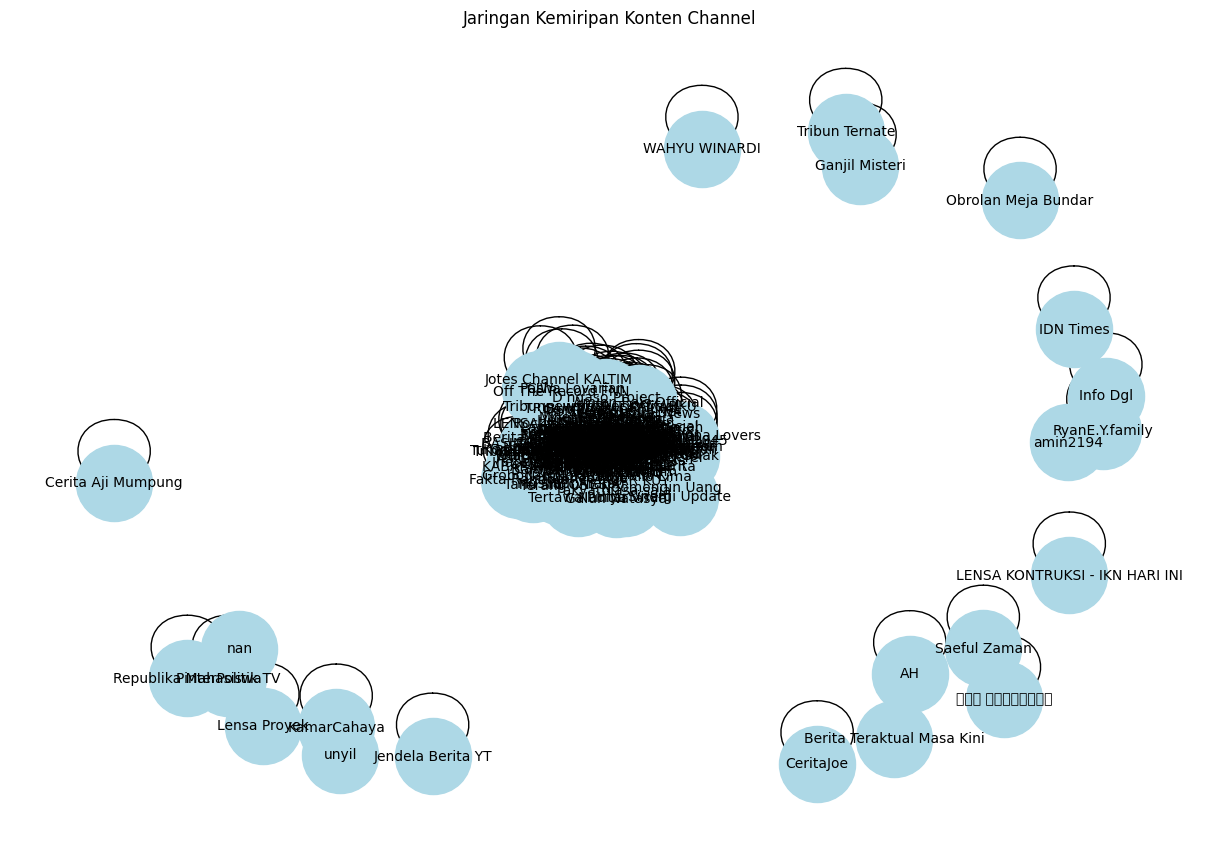

Degree Centrality: {'Tribun Travel': 0.0954356846473029, 'Kompas.com': 0.6182572614107884, 'POLITIKAL MEDIA': 0.11618257261410789, 'TJ CUKS': 0.016597510373443983, 'Tribun Solo Official': 0.16597510373443983, 'SINDOnews': 0.3278008298755187, 'Saber_Kukar': 0.03319502074688797, 'ikhfa story': 0.11203319502074689, 'rakyatbiasa saja': 0.012448132780082988, 'Titik Nol Nusantara': 0.12448132780082988, 'CNN Indonesia': 0.34439834024896265, 'Ngomongin Uang': 0.016597510373443983, 'Railingku Project': 0.029045643153526972, 'DIAN RANA': 0.058091286307053944, 'Tribun Gayo': 0.12448132780082988, 'Mata PROYEK': 0.07468879668049792, 'YT Android': 0.02074688796680498, 'PANIYANTO-IKN': 0.08298755186721991, 'INFO PAGI': 0.07883817427385892, 'Liputan6': 0.23236514522821577, 'Mr Endogen': 0.06224066390041494, 'Indonesia Terbarukan 🇮🇩': 0.11618257261410789, 'PJ CUKS': 0.024896265560165977, 'DJ CUKS': 0.024896265560165977, 'Rai Errol new': 0.06224066390041494, 'TVRI Nasional': 0.2863070539419087, 'METRO T

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt

# Langkah 1: Memuat dataset
df = pd.read_csv('labeled_data.csv')

# Menampilkan beberapa baris pertama untuk memverifikasi data
print("Pratinjau Dataset:")
print(df.head())

# Langkah 2: Menangani nilai NaN di kolom 'cleaned_judul'
# Mengganti NaN dengan string kosong
df['cleaned_judul'] = df['cleaned_judul'].fillna('')

# Langkah 3: Memvectorisasi judul yang sudah dibersihkan
tfidf = TfidfVectorizer()  # Asumsikan stop words telah dihapus dalam preprocessing
tfidf_matrix = tfidf.fit_transform(df['cleaned_judul'])

# Langkah 4: Menghitung kemiripan antar judul
cosine_sim = cosine_similarity(tfidf_matrix)

# Langkah 5: Membuat graf berdasarkan kemiripan channel
G = nx.Graph()

# Menambahkan node untuk setiap channel
channels = df['channel'].unique()
G.add_nodes_from(channels)

# Menambahkan edge berdasarkan kemiripan
threshold = 0.2  # Ambang batas kemiripan untuk mendefinisikan edge
for i, channel_i in enumerate(df['channel']):
    for j, channel_j in enumerate(df['channel']):
        if i != j and cosine_sim[i, j] > threshold:
            G.add_edge(channel_i, channel_j)

# Langkah 6: Visualisasi graf
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10)
plt.title("Jaringan Kemiripan Konten Channel")
plt.show()

# Langkah 7: Menghitung metrik centrality
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

print("Degree Centrality:", degree_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Closeness Centrality:", closeness_centrality)
